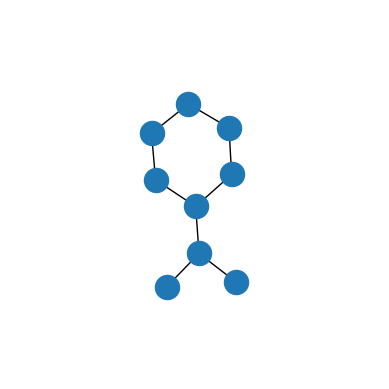

In [7]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data, Batch
import numpy as np 
import matplotlib.pyplot as plt
from dect.dect.ect import EctLayer, EctConfig
import networkx as nx


pos = torch.tensor([[ 0.05531403,  0.31317299],
       [ 0.25020841,  0.51538039],
       [ 0.43322785,  0.37765552],
       [ 0.39449602,  0.04715373],
       [ 0.18697251, -0.10709096],
       [-0.05871538, -0.05422876],
       [-0.31735225, -0.27696388],
       [-0.52772282, -0.2229272 ],
       [-0.41642837, -0.59215184]])

pos -= pos.mean()
pos /= np.linalg.norm(pos,axis=0)
ei = torch.tensor([[0, 0, 1, 2, 3, 4, 5, 6, 6],
                   [1, 5, 2, 3, 4, 5, 6, 7, 8]],dtype=torch.long)



# Vizualize graph

G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,0)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(6,8)

fig, ax = plt.subplots()

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_aspect(1)

nx.draw_kamada_kawai(G,ax=ax)# , node_size=10, pos= pos, node_color=".5")

In [27]:
# Initialize ect

V = torch.vstack(
                [
                    torch.sin(torch.linspace(0, 2 * torch.pi, 64)),
                    torch.cos(torch.linspace(0, 2 * torch.pi, 64)),
                ]
            )

CONFIG = EctConfig(num_thetas=64,bump_steps=64,ect_type="edges",device="cpu",num_features=2)
ectlayer = EctLayer(config=CONFIG,V=V)

In [36]:
batch = Batch.from_data_list(
    [
        Data(x=pos,edge_index=ei),
    ]
)

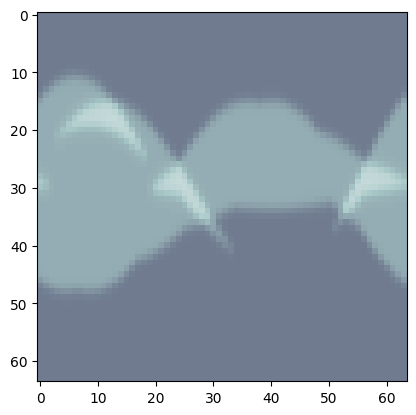

In [43]:
res = ectlayer(batch)
img = res.squeeze().numpy()
plt.imshow(img,cmap="bone",vmin=-3,vmax=3)